In [1]:
import requests
from PIL import Image

In [7]:
subscription＿key = '70ed7d3ea7aa4f2b913029bdb4bad691'

In [8]:
assert subscription＿key

In [9]:
face_api_url = 'https://20200219ryooo.cognitiveservices.azure.com/face/v1.0/detect'

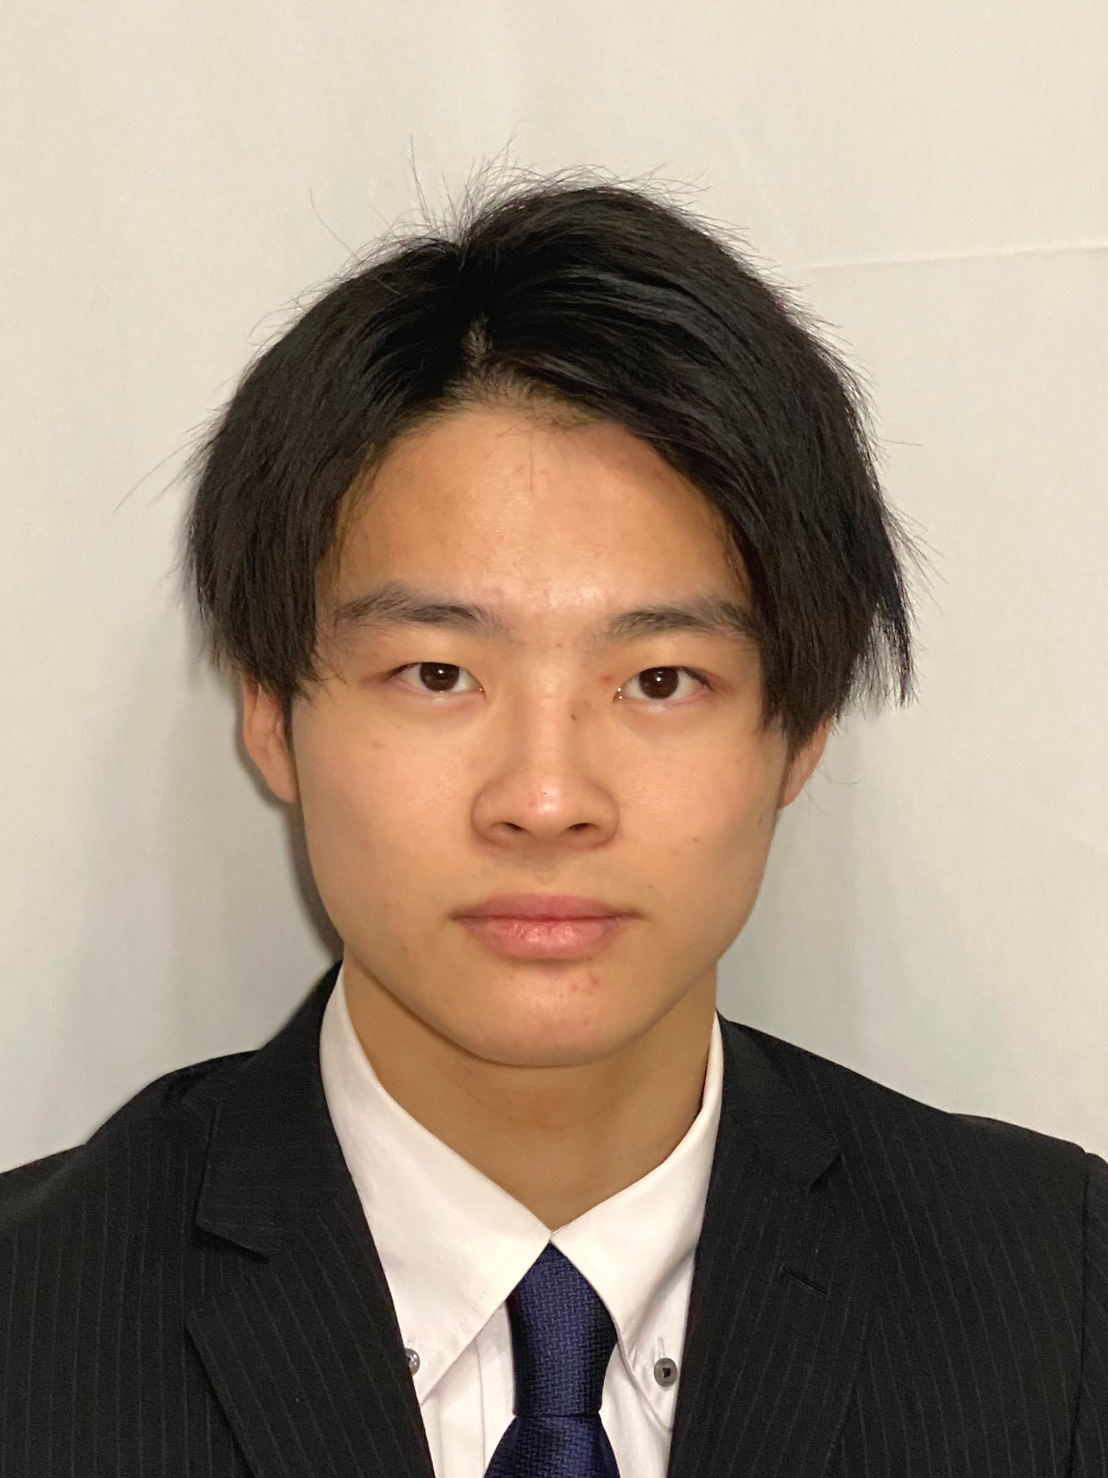

In [31]:
img = Image.open('S__30408715.jpg')
img

In [4]:
with open('S__30408715.jpg', 'rb') as f:
    binary_img = f.read()

In [6]:
#binary_img

In [13]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)

In [14]:
res

<Response [200]>

In [69]:
result = res.json()

In [20]:
rect = result[0]['faceRectangle']
rect

{'top': 544, 'left': 296, 'width': 502, 'height': 502}

In [21]:
from PIL import ImageDraw

In [34]:
draw = ImageDraw.Draw(img)

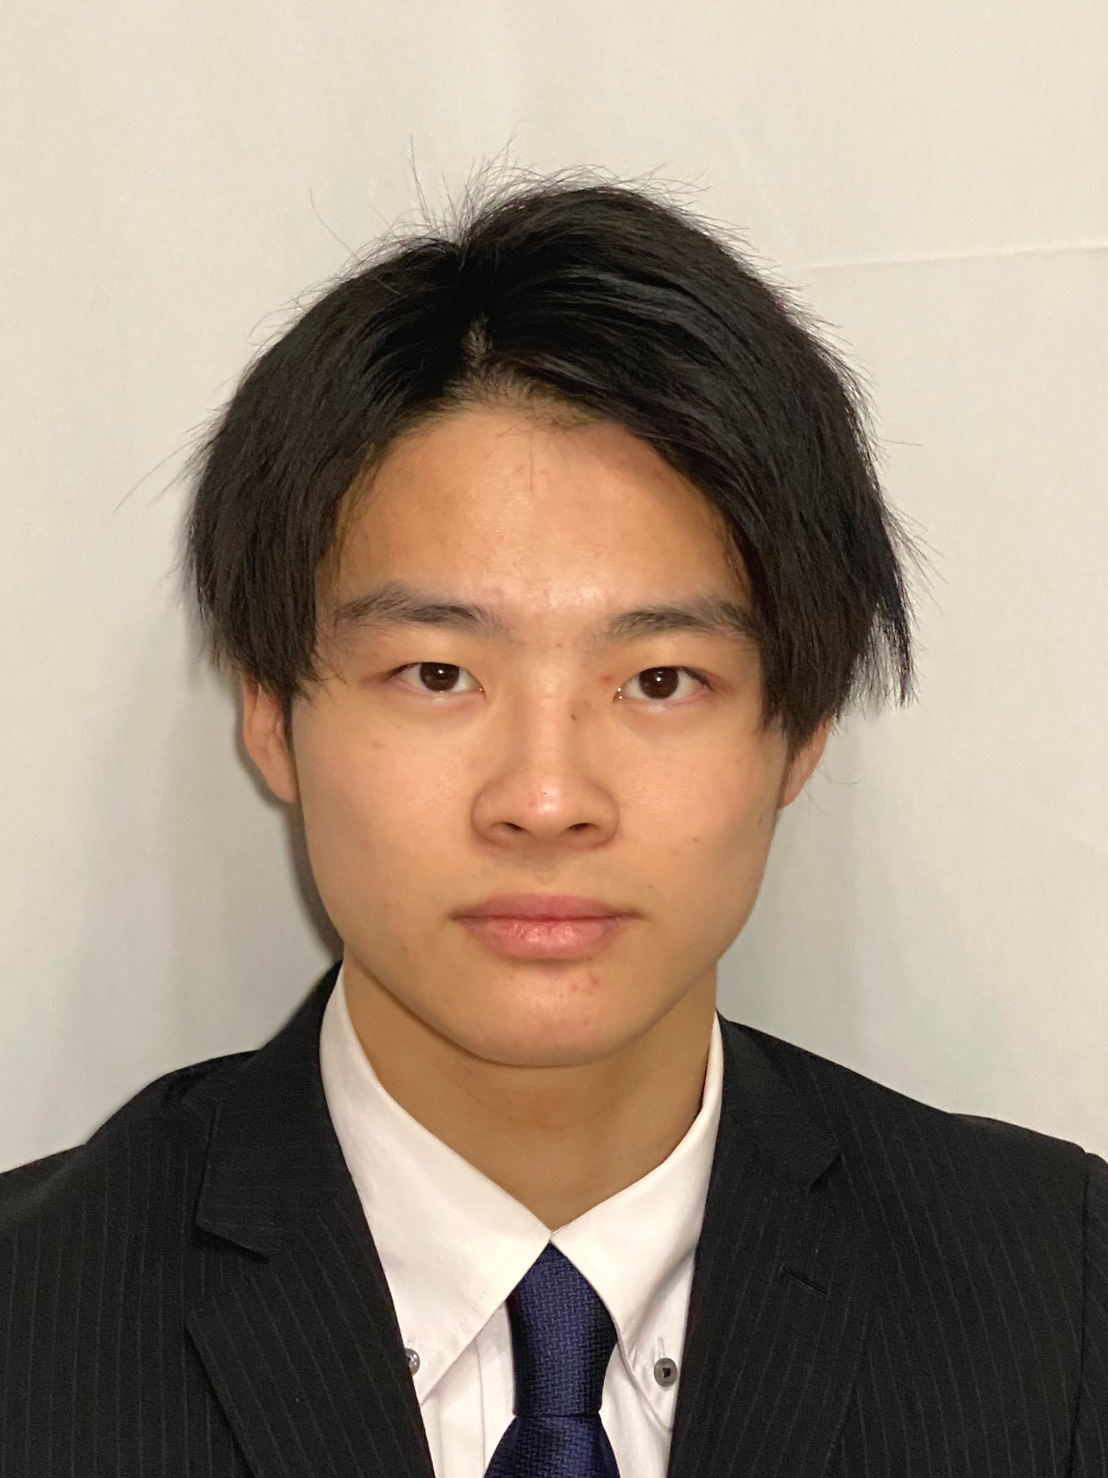

In [26]:
#draw.line([(0,50),(200,50),(0,150),(200,150)], fill= 'red',width=5)
img

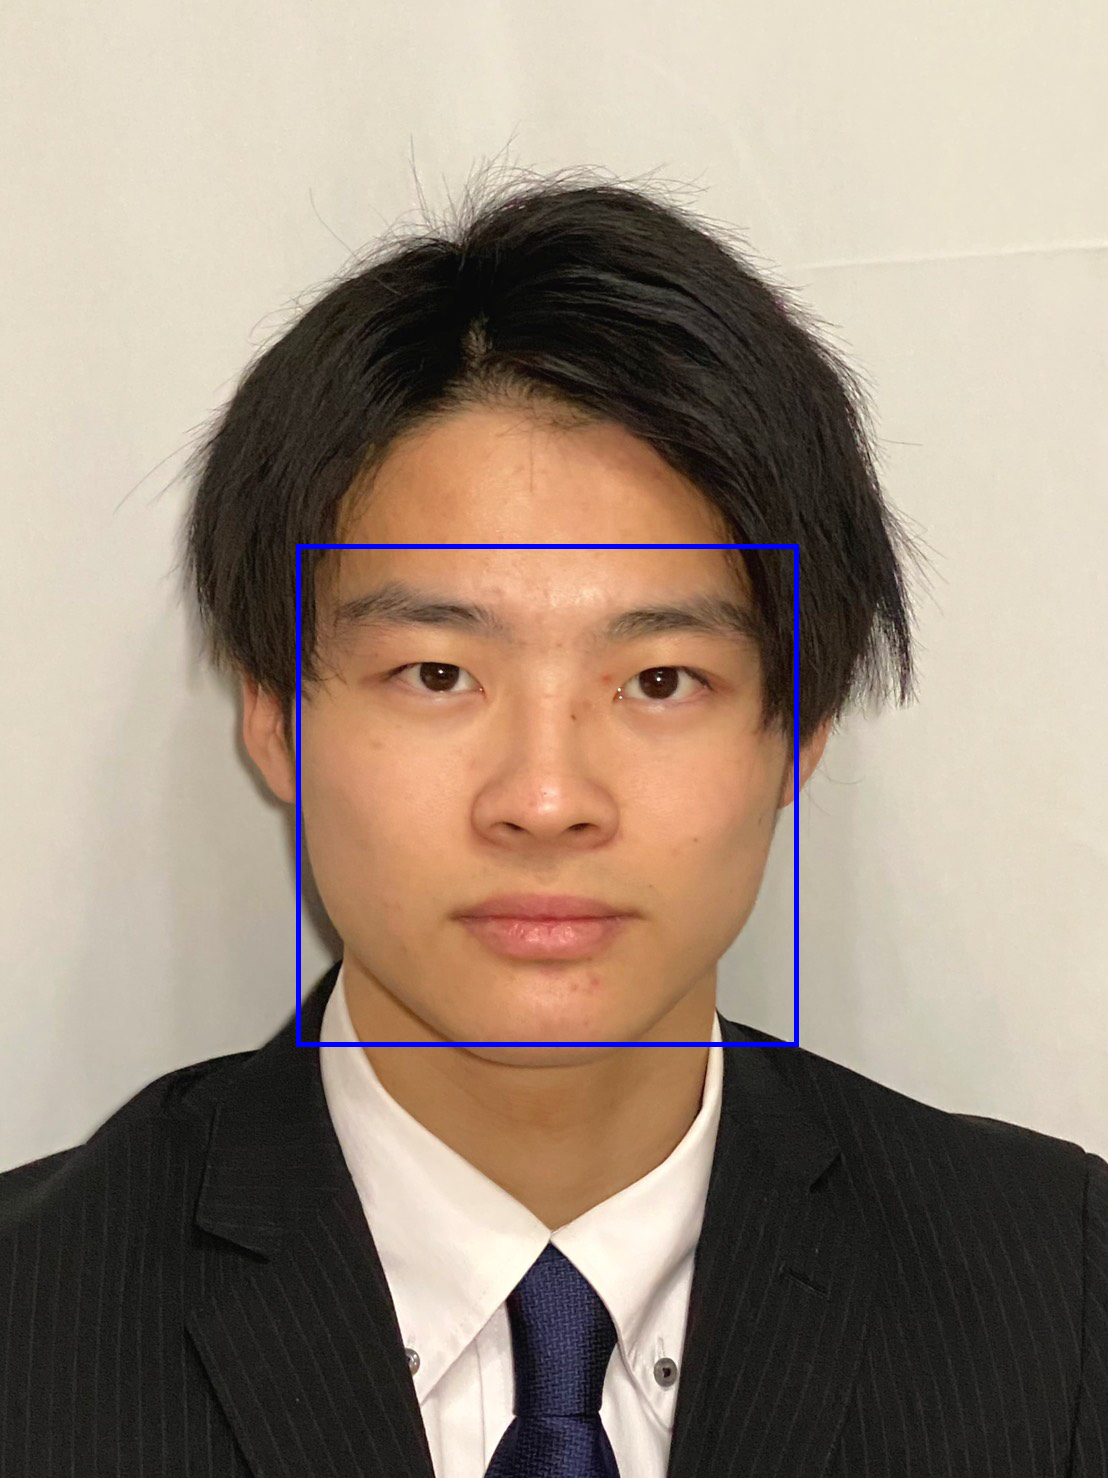

In [35]:
draw.rectangle([(rect['left'],rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])],fill=None,outline='blue',width=5)
img

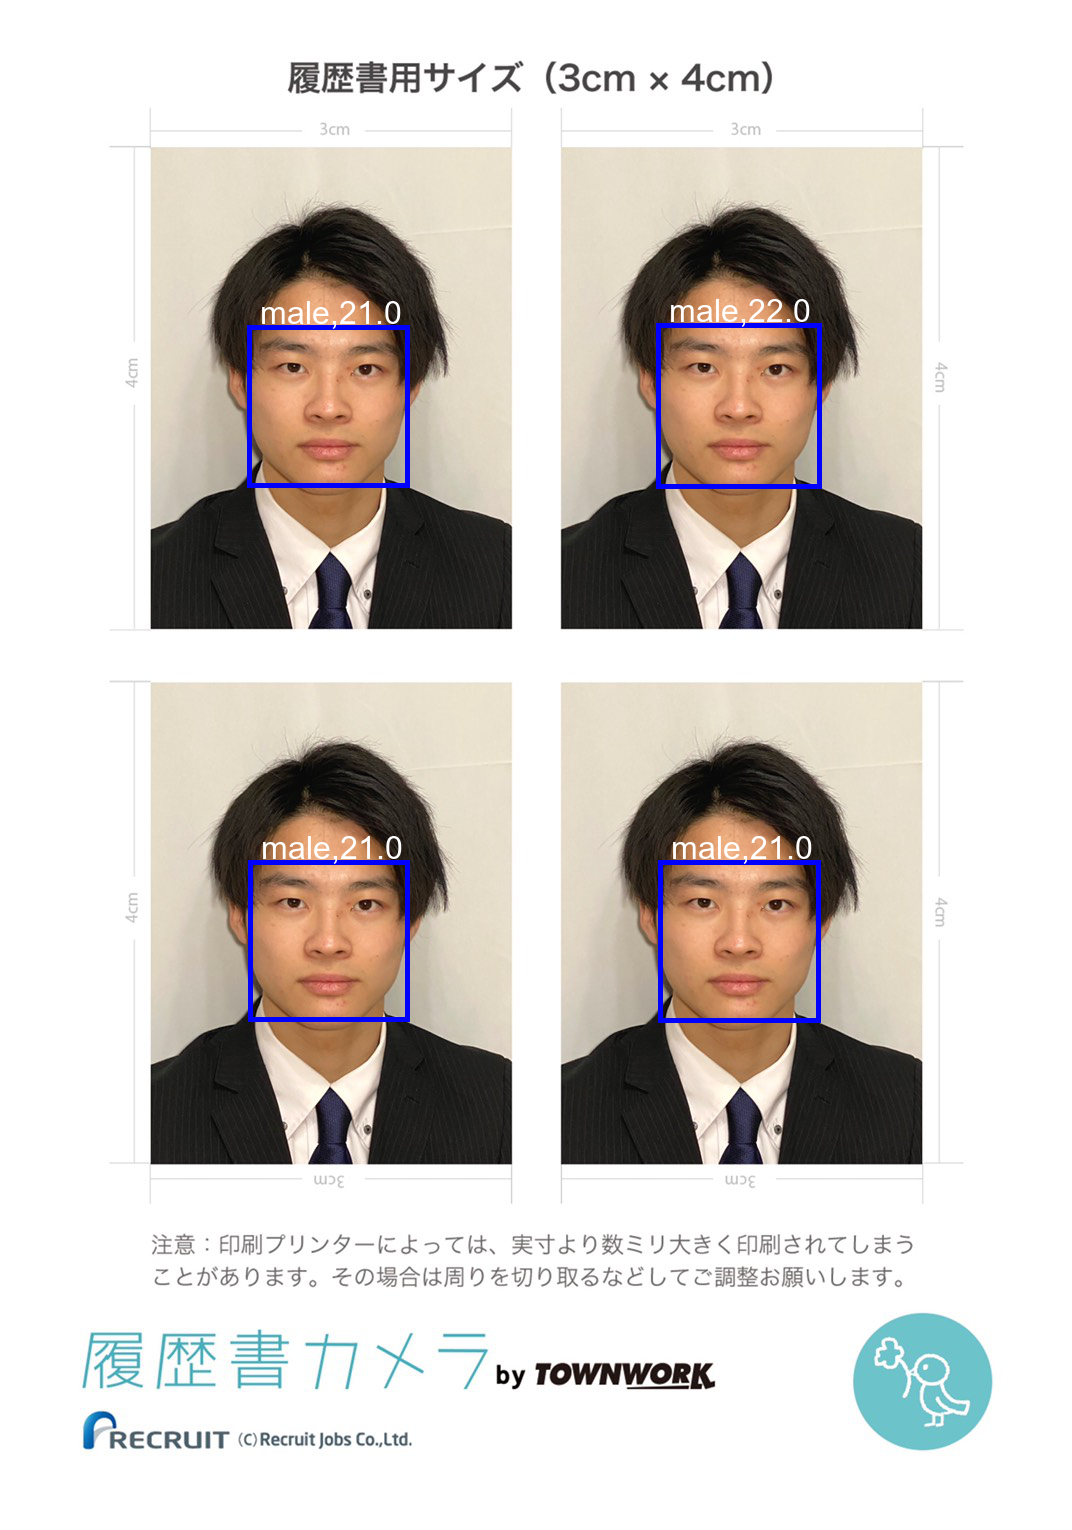

In [153]:
import requests
from PIL import Image, ImageDraw, ImageFont
import io

subscription＿key = '70ed7d3ea7aa4f2b913029bdb4bad691'
assert subscription＿key
face_api_url = 'https://20200219ryooo.cognitiveservices.azure.com/face/v1.0/detect'

font = ImageFont.truetype("arial.ttf", 32)

img = Image.open('S__30408713.jpg')

with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params,headers=headers, data=binary_img)
results = res.json()

for result in results:
    rect = result['faceRectangle']
    text = str(result['faceAttributes']['gender']) + "," + (str(result['faceAttributes']['age']))
    
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'],rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])],fill=None,outline='blue',width=5)
    draw.text(((rect['left']+rect['width']/12),rect['top']-30),text,font=font,fill=None,outline='blue',width = 100)
    
img

In [154]:
import io

In [158]:
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得